<a href="https://colab.research.google.com/github/Nada181/NLP-Disaster-Tweets/blob/main/NLP_Disaster_Tweets_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pandas numpy scikit-learn nltk spacy tensorflow matplotlib seaborn


In [5]:
!pip install -U kaleido

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.0 MB/s eta 0:00:00


In [2]:
import pandas as pd
from google.colab import drive
import numpy as np
import nltk
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import LabelBinarizer
import re
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
drive.mount('/content/drive')
train_df = pd.read_csv('//content/drive/MyDrive/Colab Notebooks/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/test.csv')


MessageError: Error: credential propagation was unsuccessful

In [3]:
print(train_df.head())
print(train_df.info())

NameError: name 'train_df' is not defined

In [4]:
train_df[:10]

NameError: name 'train_df' is not defined

Since the columns keyword & location includes NANs so will drop the NANs only.  
The id column dosen't have any importance so will be deleted,but before it let's see the importance of each column.  
\
**Detecting important features ** in a dataset is crucial for building effective models. Here are several methods you can use to identify important features:

1. Correlation Matrix
2. Feature Importance from Tree-based Models
3. Univariate Feature Selection
4. Recursive Feature Elimination (RFE)
5. Lasso Regularization
6. PCA (Principal Component Analysis)\
here we will try to use the Correlation Matrix


In [ ]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Initialize OneHotEncoder
encoder = OneHotEncoder(drop='first', handle_unknown='ignore')

# Fit and transform the 'keyword' column
encoded_keywords = encoder.fit_transform(train_df[['keyword']])

# Convert sparse matrix to dense array
encoded_keywords_dense = encoded_keywords.toarray()

# Create a DataFrame with the encoded columns
encoded_df = pd.DataFrame(encoded_keywords_dense, columns=encoder.get_feature_names_out(['keyword']))

# Concatenate the original DataFrame without the original 'keyword' column
df_final = pd.concat([train_df.drop('keyword', axis=1).reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)

# Display the final DataFrame
print(df_final.head())


   id location                                               text  target  \
0   1      NaN  Our Deeds are the Reason of this #earthquake M...       1   
1   4      NaN             Forest fire near La Ronge Sask. Canada       1   
2   5      NaN  All residents asked to 'shelter in place' are ...       1   
3   6      NaN  13,000 people receive #wildfires evacuation or...       1   
4   7      NaN  Just got sent this photo from Ruby #Alaska as ...       1   

   keyword_accident  keyword_aftershock  keyword_airplane%20accident  \
0               0.0                 0.0                          0.0   
1               0.0                 0.0                          0.0   
2               0.0                 0.0                          0.0   
3               0.0                 0.0                          0.0   
4               0.0                 0.0                          0.0   

   keyword_ambulance  keyword_annihilated  keyword_annihilation  ...  \
0                0.0            

**Data exploration**

In [ ]:

# Check the length of the tweet texts
print(f"Number of tweet texts: {len(train_df)}")

# Check the length of the target labels
print(f"Number of labels: {len(y_train)}")


Number of tweet texts: 7613
Number of labels: 6090


The results indicate a mismatch between the number of tweet texts and the number of labels in your dataset:

Number of tweet texts: 7613: This means there are 7,613 tweets available in your dataset.
Number of labels: 6090: This means there are only 6,090 corresponding labels for these tweets.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer


# Assuming 'text' is the column containing the tweets and 'target' is the label
# Split the data into features and target
X = train_df['text']
y = train_df['target']

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer()
X_vectorized = vectorizer.fit_transform(X)

# Convert the sparse matrix to a DataFrame if needed
X_vectorized_df = pd.DataFrame(X_vectorized.toarray(), columns=vectorizer.get_feature_names_out())

# Concatenate with target variable
df_final = pd.concat([X_vectorized_df, y.reset_index(drop=True)], axis=1)

# Display the final DataFrame
print(df_final.head())

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_vectorized_df, y, test_size=0.2, random_state=42)

# Now we can fit your model


    00       000  0000  007npen6lg  00cy9vxeff  00end  00pm   01   02  0215  \
0  0.0  0.000000   0.0         0.0         0.0    0.0   0.0  0.0  0.0   0.0   
1  0.0  0.000000   0.0         0.0         0.0    0.0   0.0  0.0  0.0   0.0   
2  0.0  0.000000   0.0         0.0         0.0    0.0   0.0  0.0  0.0   0.0   
3  0.0  0.417447   0.0         0.0         0.0    0.0   0.0  0.0  0.0   0.0   
4  0.0  0.000000   0.0         0.0         0.0    0.0   0.0  0.0  0.0   0.0   

   ...  ûò800000  ûòthe  ûòåêcnbc   ûó  ûóher  ûókody  ûónegligence  ûótech  \
0  ...       0.0    0.0       0.0  0.0    0.0     0.0           0.0     0.0   
1  ...       0.0    0.0       0.0  0.0    0.0     0.0           0.0     0.0   
2  ...       0.0    0.0       0.0  0.0    0.0     0.0           0.0     0.0   
3  ...       0.0    0.0       0.0  0.0    0.0     0.0           0.0     0.0   
4  ...       0.0    0.0       0.0  0.0    0.0     0.0           0.0     0.0   

   ûówe  target  
0   0.0       1  
1   0.0       

In [ ]:
# Drop the 'id' column
train_df = train_df.drop(columns=['id'])
# Drop rows where 'text' or 'target' contains NaN values
df_cleaned = train_df.dropna(subset=['text', 'target'])

In [ ]:
# Download NLTK stopwords if needed
nltk.download('stopwords')
stop_words = stopwords.words('english')

# Define a text cleaning function
def clean_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Remove punctuation and numbers
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'\W', ' ', text)

    # Tokenize and remove stopwords
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]

    # Join tokens back to string
    cleaned_text = ' '.join(tokens)

    return cleaned_text

# Apply the cleaning function to the 'text' column
train_df['cleaned_text'] = train_df['text'].apply(clean_text)
test_df['cleaned_text'] = test_df['text'].apply(clean_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Feature Extraction\
Use TfidfVectorizer to convert the cleaned text into numerical features.

In [ ]:
# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))

# Fit and transform the training data
X = tfidf.fit_transform(train_df['cleaned_text'])

# Transform the test data
X_test = tfidf.transform(test_df['cleaned_text'])

# Define target variable
y = train_df['target']


Model Building and Training \
here we are going to choose the Logistic Regression Algorithm  


In [ ]:
# Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = model.predict(X_train)


Accuracy: 0.8888341543513957
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.96      0.91      3468
           1       0.94      0.79      0.86      2622

    accuracy                           0.89      6090
   macro avg       0.90      0.88      0.88      6090
weighted avg       0.89      0.89      0.89      6090



 Make Predictions on Test Data \
Use the trained model to make predictions on the test data.

Number of tweet texts: 7613
Number of labels: 6090


AUC: 0.86


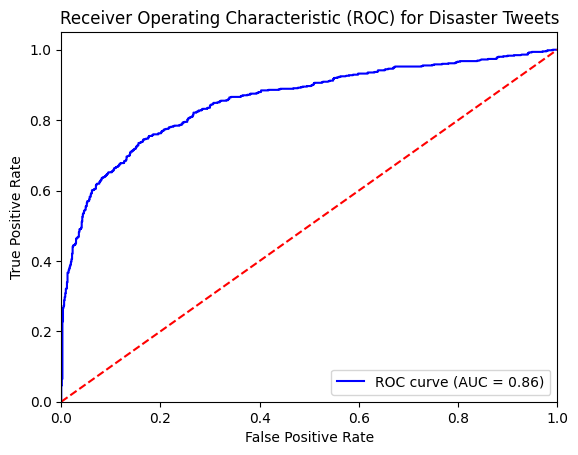

In [ ]:
# Step 1: Preprocess the dataset
def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    # Convert to lowercase
    text = text.lower()
    # Remove stopwords
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

train_df['cleaned_text'] = train_df['text'].apply(preprocess_text)

# Step 2: Vectorize the text using TF-IDF
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(train_df['cleaned_text'])

# Step 3: Define the target variable (disaster or not)
y = train_df['target']  # 'target' column has labels (0: not disaster, 1: disaster)

# Step 4: Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train a Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Step 6: Get predicted probabilities for the positive class (class 1)
y_prob = model.predict_proba(X_test)[:, 1]

# Step 7: Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Step 8: Calculate AUC
auc = roc_auc_score(y_test, y_prob)
print(f"AUC: {auc:.2f}")

# Step 9: Plot ROC curve
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f"ROC curve (AUC = {auc:.2f})")
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for Disaster Tweets')
plt.legend(loc="lower right")
plt.show()


An AUC of 0.86 suggests that the model correctly ranks positive cases (e.g., disaster tweets) higher than negative ones (non-disaster tweets) 86% of the time, which is considered a strong performance.

 **Model Evaluation** \
Evaluate the model using accuracy, F1 score, precision, recall, and classification report.

In [ ]:
# Evaluate the model
print(f"Accuracy: {accuracy_score(y_train, y_pred)}")
print(f"Classification Report:\n {classification_report(y_train, y_pred)}")

Accuracy: 0.8888341543513957
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.96      0.91      3468
           1       0.94      0.79      0.86      2622

    accuracy                           0.89      6090
   macro avg       0.90      0.88      0.88      6090
weighted avg       0.89      0.89      0.89      6090



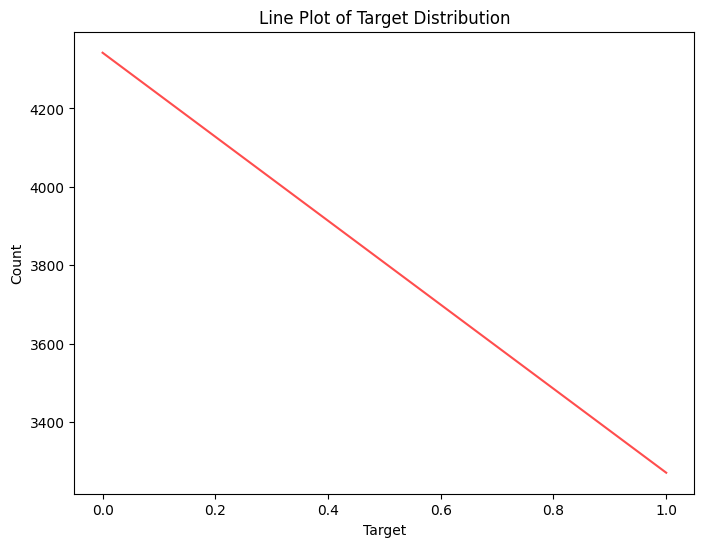

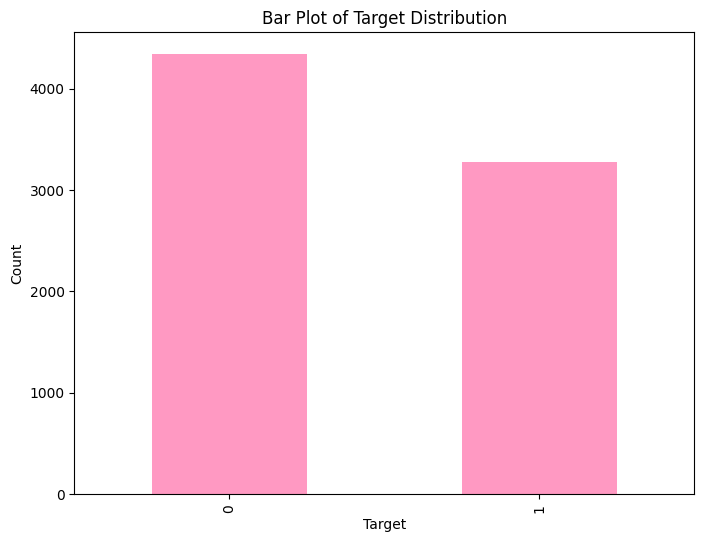

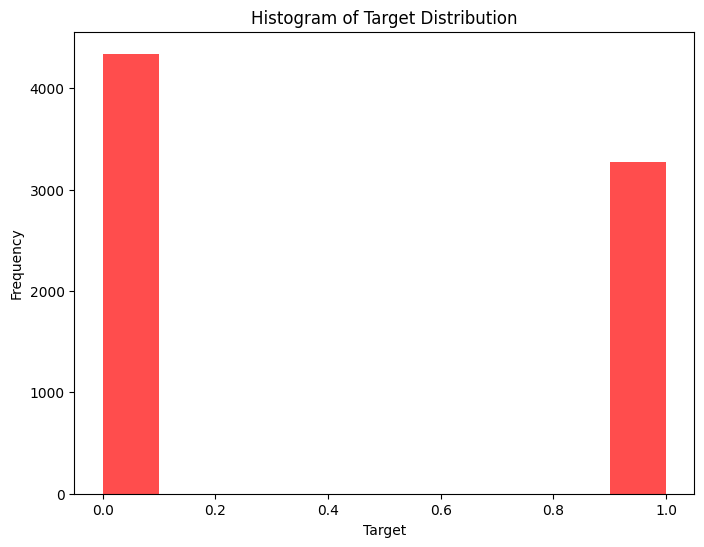

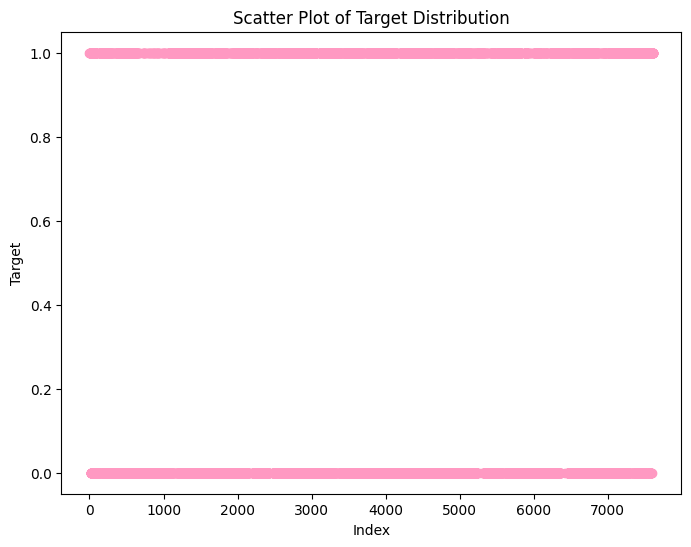

<ipython-input-95-1388873faaa3>:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=train_df['target'], palette=red_pink_palette)
<ipython-input-95-1388873faaa3>:42: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.boxplot(x=train_df['target'], palette=red_pink_palette)


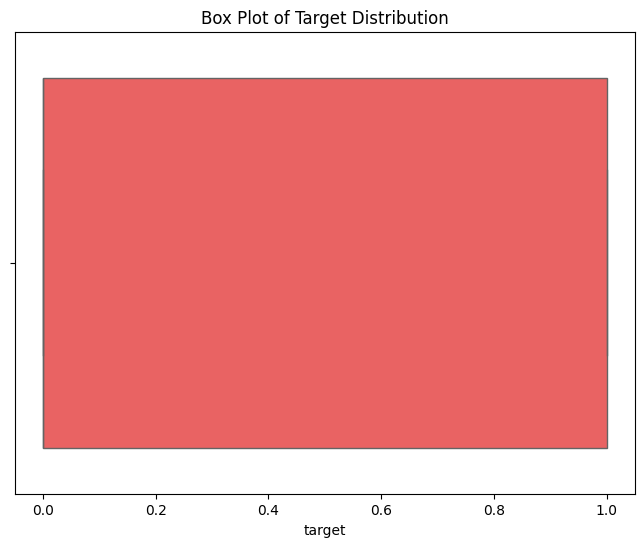

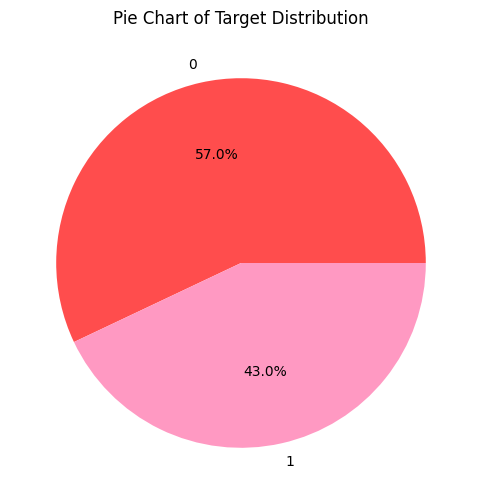

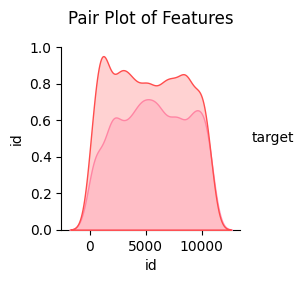

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set color palette for red and pink
red_pink_palette = ['#ff4d4d', '#ff99c2']

# Line plot
plt.figure(figsize=(8, 6))
train_df['target'].value_counts().sort_index().plot(kind='line', color=red_pink_palette[0])
plt.title('Line Plot of Target Distribution')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

# Bar plot
plt.figure(figsize=(8, 6))
train_df['target'].value_counts().plot(kind='bar', color=red_pink_palette[1])
plt.title('Bar Plot of Target Distribution')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

# Histogram
plt.figure(figsize=(8, 6))
train_df['target'].plot(kind='hist', color=red_pink_palette[0], bins=10)
plt.title('Histogram of Target Distribution')
plt.xlabel('Target')
plt.ylabel('Frequency')
plt.show()

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(train_df.index, train_df['target'], color=red_pink_palette[1])
plt.title('Scatter Plot of Target Distribution')
plt.xlabel('Index')
plt.ylabel('Target')
plt.show()

# Box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x=train_df['target'], palette=red_pink_palette)
plt.title('Box Plot of Target Distribution')
plt.show()

# Pie chart
plt.figure(figsize=(8, 6))
train_df['target'].value_counts().plot(kind='pie', colors=red_pink_palette, autopct='%1.1f%%')
plt.title('Pie Chart of Target Distribution')
plt.ylabel('')  # Hides the y-label
plt.show()

# Pair plot (if there are numeric features)
sns.pairplot(train_df, hue='target', palette=red_pink_palette)
plt.title('Pair Plot of Features')
plt.show()
